In [ ]:
import pandas as pd

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import joblib

# Load and preprocess dataset
df = pd.read_csv("linked_in_data.csv")
categorical_columns = ["Workplace", "Location", "Experiences", "Activities", "About", "Photo"]

for column in categorical_columns:
    df[column] = df[column].astype("category")

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_columns])
numerical_features = ["Connections", "Followers", "Number of Experiences", "Number of Educations", "Number of Licenses",
                      "Number of Volunteering", "Number of Skills", "Number of Recommendations", "Number of Projects",
                      "Number of Publications", "Number of Courses", "Number of Honors", "Number of Scores",
                      "Number of Languages", "Number of Organizations", "Number of Interests", "Number of Activities"]
X = pd.concat([df[numerical_features], pd.DataFrame(encoded_data.toarray())], axis=1)
X.columns = X.columns.astype(str)
y = df["Label"].replace({"LLPs": 0, "FLPs": 1, "CLPs based on legitimate profiles' statistics": 10, "CLPs based on fake profiles' statistics": 11})

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

param_grid = {
    'n_estimators': [100, 200],  # Reduced number of choices
    'max_depth': [10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV with n_jobs=1
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Get the best estimator
best_classifier = grid_search.best_estimator_

joblib.dump(best_classifier, 'Linkedin_predictive_model.pkl')
joblib.dump(encoder, 'encoder.pkl')

# Evaluate the model
y_train_pred = best_classifier.predict(X_train_smote)
y_test_pred = best_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

train_report = classification_report(y_train_smote, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("\nTraining Classification Report:\n", train_report)
print("\nTesting Classification Report:\n", test_report)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_sa

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["LLPs", "FLPs", "CLPs (Legit)", "CLPs (Fake)"], output_dict=True)

# Convert classification report to DataFrame
df_report = pd.DataFrame(report).transpose()

print("Accuracy Score:", accuracy)
print("\nClassification Report:")
print(df_report)


Accuracy Score: 0.9694444444444444

Classification Report:
              precision    recall  f1-score     support
LLPs           0.960784  0.982808  0.971671  349.000000
FLPs           0.943262  0.904762  0.923611  147.000000
CLPs (Legit)   1.000000  1.000000  1.000000  117.000000
CLPs (Fake)    1.000000  0.981308  0.990566  107.000000
accuracy       0.969444  0.969444  0.969444    0.969444
macro avg      0.976012  0.967220  0.971462  720.000000
weighted avg   0.969407  0.969444  0.969270  720.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate accuracy scorex
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.9694444444444444


In [55]:
import pandas as pd
import joblib

# Load the trained model
classifier = joblib.load('Linkedin_predictive_model.pkl')  
# Load the encoder for categorical variables
encoder = joblib.load('encoder.pkl')

# Define categorical columns
categorical_columns = ["Workplace", "Location", "Experiences", "Activities", "About", "Photo"]

# Define numerical columns
numerical_columns = ["Connections", "Followers", "Number of Experiences", "Number of Educations", "Number of Licenses", 
                      "Number of Volunteering", "Number of Skills", "Number of Recommendations", "Number of Projects", 
                      "Number of Publications", "Number of Courses", "Number of Honors", "Number of Scores", 
                      "Number of Languages", "Number of Organizations", "Number of Interests", "Number of Activities"]

def predict_profile(numerical_features, categorical_features):
    """
    Predict if a LinkedIn profile is real or fake based on numerical and categorical features.

    Parameters:
        numerical_features (list): Numerical features of the LinkedIn profile.
        categorical_features (list): Categorical features of the LinkedIn profile.

    Returns:
        str: Predicted label ('Real' or 'Fake').
    """
    # Combine numerical and categorical features
    X = pd.DataFrame([numerical_features + categorical_features], columns=numerical_columns + categorical_columns)

    # Convert all numerical columns to strings
    X[numerical_columns] = X[numerical_columns].astype(str)

    # Reorder columns to match the order during model training
    X = X[numerical_columns + categorical_columns]

    # Convert categorical features to one-hot encoded format
    encoded_data = encoder.transform(X[categorical_columns])

    # Combine numerical and encoded categorical features in the correct order
    X_encoded = pd.concat([X[numerical_columns], pd.DataFrame(encoded_data.toarray())], axis=1)

    # Convert column names to strings
    X_encoded.columns = X_encoded.columns.astype(str)

    # Predict the label
    predicted_label = classifier.predict(X_encoded)

    # Map predicted label to human-readable format
    label_mapping = {0: 'Real', 1: 'Fake', 10: 'CLP based on legitimate profiles', 11: 'CLP based on fake profiles'}
    predicted_label_human_readable = label_mapping[predicted_label[0]]

    return predicted_label_human_readable

# Put in numerical features
numerical_features = [0, 0, 300, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]

# Put in categorical features
categorical_features = ["Technology Company", "New York", "Software Engineer", "Hiking", "Passionate about coding", "Has profile picture"]

predicted_label = predict_profile(numerical_features, categorical_features)
print("Predicted label:", predicted_label)


Predicted label: Fake


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

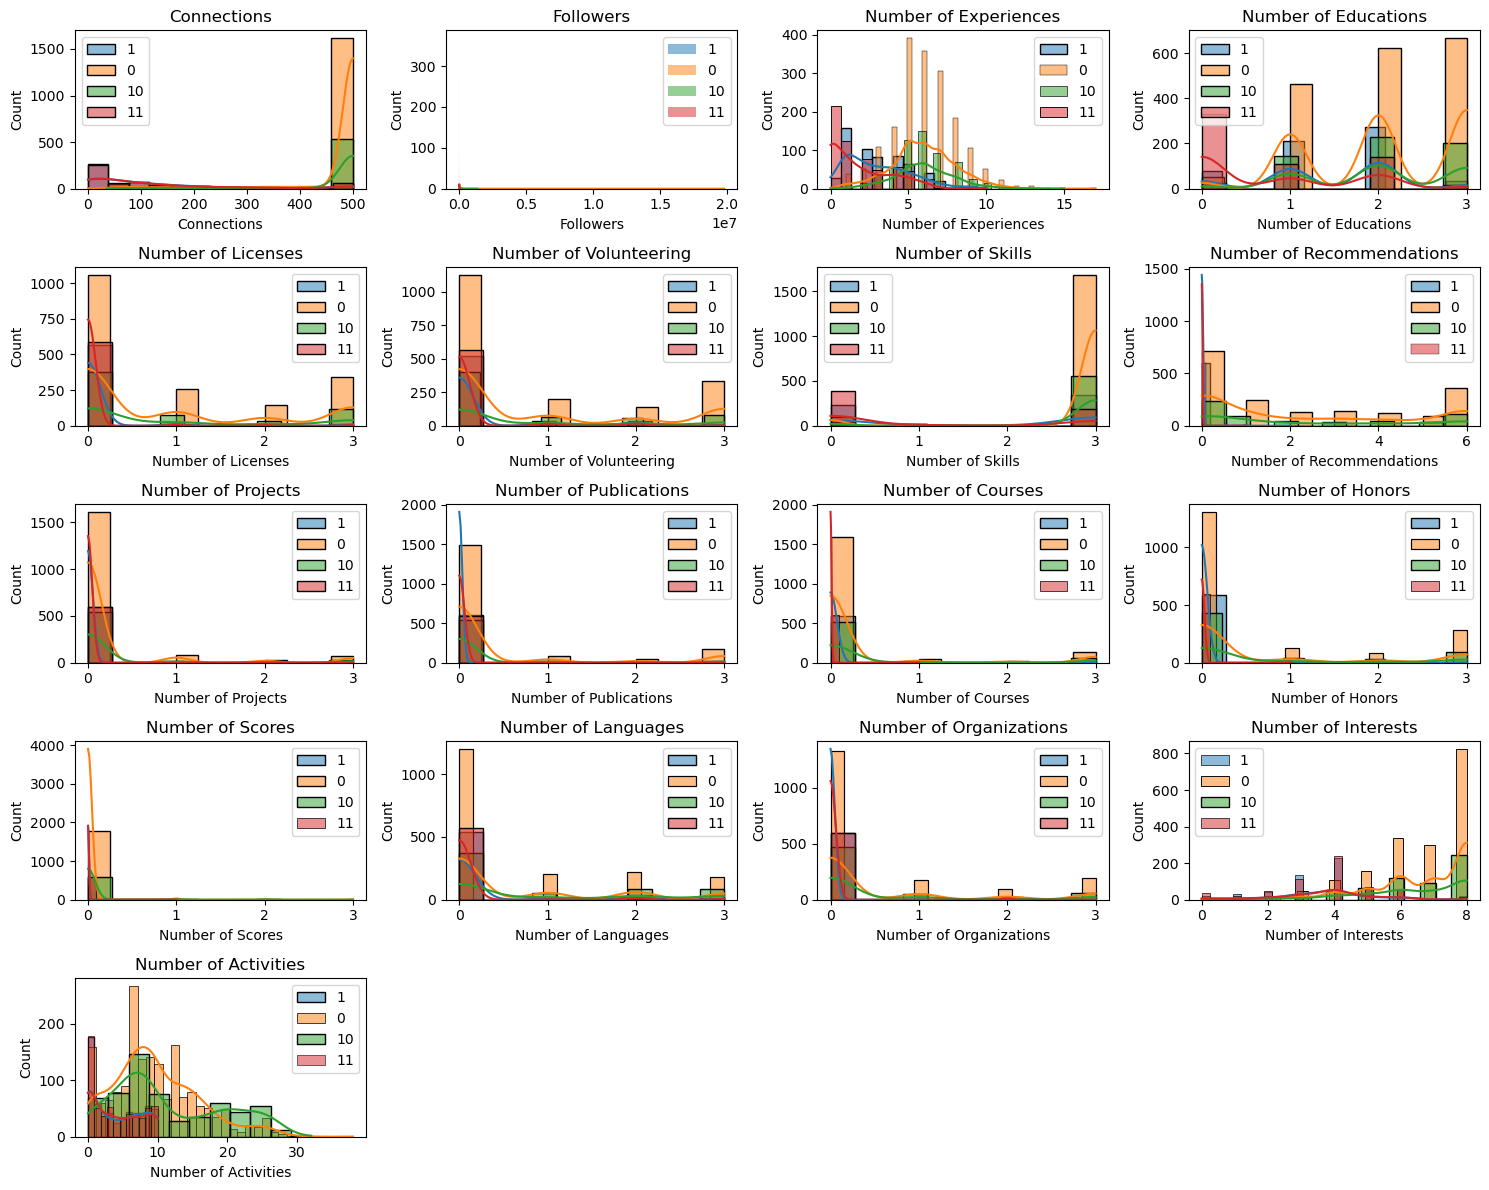

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("linked_in_data.csv")

# Define numerical features
numerical_features = ["Connections", "Followers", "Number of Experiences", "Number of Educations", "Number of Licenses",
                      "Number of Volunteering", "Number of Skills", "Number of Recommendations", "Number of Projects",
                      "Number of Publications", "Number of Courses", "Number of Honors", "Number of Scores",
                      "Number of Languages", "Number of Organizations", "Number of Interests", "Number of Activities"]

# Convert 'Label' column to string
df['Label'] = df['Label'].astype(str)

# Create subplots for each numerical feature
plt.figure(figsize=(15, 12))
num_subplots = min(len(numerical_features), 18)  # Maximum of 18 numerical features
labels = df['Label'].unique()

for i, feature in enumerate(numerical_features):
    if i < num_subplots:
        plt.subplot(5, 4, i + 1)  # Adjusted subplot layout for 18 subplots
        for label in labels:
            sns.histplot(df[df['Label'] == label][feature], kde=True, label=label)
        plt.title(feature)
        plt.legend()
    else:
        break

plt.tight_layout()
plt.show()
